<a href="https://colab.research.google.com/github/CasCard/Machine-Learning-Project/blob/master/ANNMNIST_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time as t

TensorFlow 2.x selected.


In [2]:
print(tf.__version__)

2.1.0


In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255
print("x_train.shape",x_train.shape)

x_train.shape (60000, 28, 28)


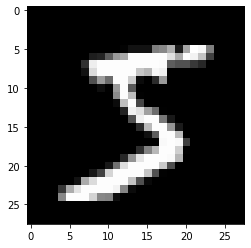

In [4]:
plt.imshow(x_train[0],cmap="gray")
plt.show()

In [0]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128,activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10,activation="softmax")
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [8]:
import time as t
A1=t.time()
r=model.fit(x_train,y_train,validation_split=0.20,epochs=10)
A2=t.time()
print(A2-A1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 125us/sample - loss: 0.3273 - accuracy: 0.9047 - val_loss: 0.1622 - val_accuracy: 0.9524
Epoch 2/10
48000/48000 [==============================] - 4s 82us/sample - loss: 0.1599 - accuracy: 0.9533 - val_loss: 0.1215 - val_accuracy: 0.9654
Epoch 3/10
48000/48000 [==============================] - 4s 83us/sample - loss: 0.1195 - accuracy: 0.9644 - val_loss: 0.1025 - val_accuracy: 0.9709
Epoch 4/10
48000/48000 [==============================] - 4s 83us/sample - loss: 0.0950 - accuracy: 0.9712 - val_loss: 0.0964 - val_accuracy: 0.9712
Epoch 5/10
48000/48000 [==============================] - 4s 81us/sample - loss: 0.0809 - accuracy: 0.9749 - val_loss: 0.0878 - val_accuracy: 0.9741
Epoch 6/10
48000/48000 [==============================] - 4s 82us/sample - loss: 0.0717 - accuracy: 0.9778 - val_loss: 0.0831 - val_accuracy: 0.9751
Epoch 7/10
48000/48000 [==============================]

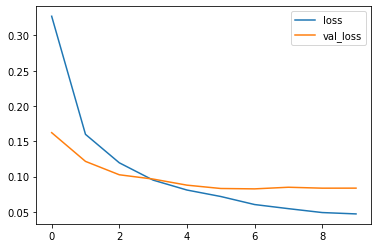

In [9]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

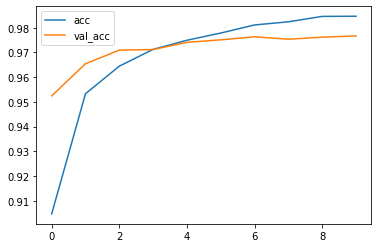

In [10]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [11]:
A3=t.time()
print(model.evaluate(x_test,y_test))
A4=t.time()
print(A4-A3)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.0733 - accuracy: 0.9780
[0.07326709107608767, 0.978]
0.6903791427612305


In [12]:
predictions=model.predict([x_test])
print(np.argmax(predictions[1000]))

9


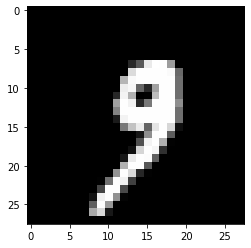

In [13]:
plt.imshow(x_test[1000],cmap="gray")
plt.show()